In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('capstone_1/bigframe.csv')
df.head()

,Unnamed: 0,checkin_id,beer.bid,user.uid,rating_score,brewery.brewery_name,beer.beer_name,beer.beer_style,brewery.brewery_id,brewery.brewery_type,...,venue.location.venue_city,venue.location.venue_country,venue.location.venue_state,venue.primary_category,venue.venue_id,checkin_comment,created_at,beer.rating_score,beer.beer_description,abv
0,0,821797539,2095023,3340203,3.75,Stone Brewing,Stone Scorpion Bowl IPA,IPA - American,1204,Regional Brewery,...,NaN,NaN,NaN,NaN,NaN,"Easy-drinking, not too hoppy. Solid.","Sat, 26 Oct 2019 03:52:50 +0000",3.73789,To create a recipe so tropical and fruity with...,7.5
1,71,818949121,1709568,3340203,3.50,Ritual Brewing Company,Pale Ale,Pale Ale - American,39329,Micro Brewery,...,Redlands,United States,CA,Nightlife Spot,376422.0,Solid.,"Sat, 19 Oct 2019 03:07:43 +0000",NaN,NaN,5.2
2,72,818856642,2734572,3340203,4.25,Ritual Brewing Company,Oil Rig,IPA - Imperial / Double,39329,Micro Brewery,...,Redlands,United States,CA,Nightlife Spot,376422.0,Gooood stuff. Cool place too.,"Sat, 19 Oct 2019 00:37:37 +0000",3.87873,NEW TRADITIONS CALL FOR NEW HOLIDAYS AND NEW H...,9.0
3,75,815159720,1044097,3340203,4.25,Stone Brewing,Stone Ruination Double IPA 2.0,IPA - Imperial / Double,1204,Regional Brewery,...,NaN,NaN,NaN,NaN,NaN,Probably the best Stone beer I’ve had. I’m a fan.,"Thu, 10 Oct 2019 02:20:55 +0000",4.01290,Stone Ruination IPA was the first full-time br...,8.5
4,105,814916483,1070,3340203,3.75,Lagunitas Brewing Company,Imperial Stout,Stout - Russian Imperial,765,Macro Brewery,...,NaN,NaN,NaN,NaN,NaN,"A really nice, if unspectacular, stout.","Wed, 09 Oct 2019 04:25:53 +0000",3.91420,"Made with Highly roasted malted barley, and pl...",9.9


For checkins which have ratings:

In [3]:
df[df.rating_score > 0].rating_score.mean()

3.831154052027159

For beers which have global ratings:

In [99]:
df[pd.notnull(df['beer.rating_score'])]['beer.rating_score'].mean()

3.8156002166572343

Don't need to filter out NaN's; They're excluded automatically:

In [98]:
df['beer.rating_score'].mean()

3.8156002166572343

In [5]:
df.columns

Index(['Unnamed: 0', 'checkin_id', 'beer.bid', 'user.uid', 'rating_score',
       'brewery.brewery_name', 'beer.beer_name', 'beer.beer_style',
       'brewery.brewery_id', 'brewery.brewery_type', 'brewery.country_name',
       'brewery.location.brewery_city', 'brewery.location.brewery_state',
       'brewery.location.lat', 'brewery.location.lng',
       'venue.categories.items', 'venue.location.lat', 'venue.location.lng',
       'venue.location.venue_city', 'venue.location.venue_country',
       'venue.location.venue_state', 'venue.primary_category',
       'venue.venue_id', 'checkin_comment', 'created_at', 'beer.rating_score',
       'beer.beer_description', 'abv'],
      dtype='object')

10,000 random samples, for quicker EDA

In [6]:
tenKdf = df.sample(10000)

In [7]:
# make sure the samples have similar stats to all checkins
tenKdf[tenKdf.rating_score > 0].rating_score.mean()

3.828605980650835

In [8]:
tenKdf[pd.notnull(tenKdf['beer.rating_score'])]['beer.rating_score'].mean()

3.808981557844901

In [9]:
%matplotlib inline

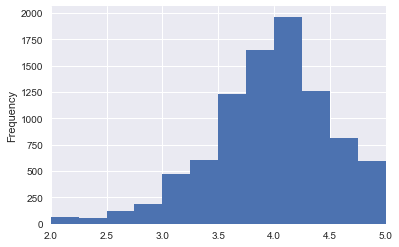

In [10]:
tenKdf['rating_score'].plot(kind='hist', bins=20)
plt.xlim(2,5)  ## This is where almost every rating falls
plt.show()

Only keep rows with user ratings.

In [11]:
tenKdf=tenKdf[tenKdf['rating_score'] > 0]

In [12]:
len(tenKdf)

9096

What's the most that any one user is represented in this sample?

In [13]:
max(tenKdf.groupby('user.uid').size())

7

How much is each type of brewery represented?

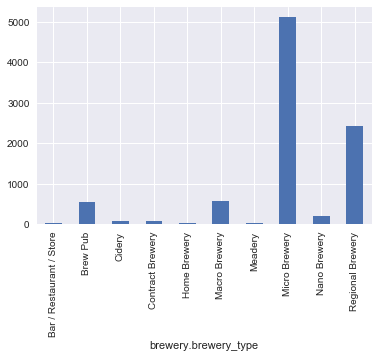

In [15]:
tenKdf.groupby('brewery.brewery_type').size().plot(kind='bar')
plt.show()

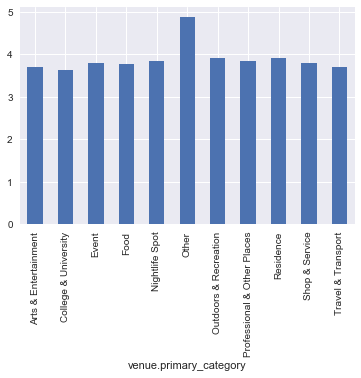

In [16]:
tenKdf[tenKdf['venue.primary_category'].notnull()].groupby(
    'venue.primary_category')['rating_score'].mean().plot(kind='bar')

In [17]:
tenKdf[tenKdf['venue.primary_category'].notnull()].groupby(
    'venue.primary_category')['rating_score'].mean()

venue.primary_category
Arts & Entertainment           3.710694
College & University           3.631579
Event                          3.792857
Food                           3.772969
Nightlife Spot                 3.833204
Other                          4.875000
Outdoors & Recreation          3.908795
Professional & Other Places    3.845541
Residence                      3.906068
Shop & Service                 3.795962
Travel & Transport             3.692661
Name: rating_score, dtype: float64

In [19]:
steez = tenKdf.groupby('beer.beer_style')['rating_score'].mean()

In [20]:
steez = steez.sort_values(ascending=False)
steez.head()

beer.beer_style
Lambic - Framboise                   4.500000
Rye Wine                             4.500000
Lambic - Kriek                       4.458333
Mead - Other                         4.375000
Stout - Imperial / Double Oatmeal    4.326087
Name: rating_score, dtype: float64

How do the IPA's fit in there?

In [21]:
ipas = steez.index.str.startswith('IPA')

steez[ipas]

beer.beer_style
IPA - Imperial / Double Milkshake      4.250000
IPA - Triple New England               4.160714
IPA - Imperial / Double New England    4.107510
IPA - Triple                           4.100806
IPA - Imperial / Double                4.067662
IPA - Rye                              3.973684
IPA - White                            3.965909
IPA - New England                      3.921829
IPA - Belgian                          3.916667
IPA - American                         3.876505
IPA - Black / Cascadian Dark Ale       3.875000
IPA - Sour                             3.856410
IPA - Milkshake                        3.827320
IPA - Red                              3.784091
IPA - Imperial / Double Black          3.777778
IPA - International                    3.707143
IPA - English                          3.697368
IPA - Brut                             3.637255
IPA - Session / India Session Ale      3.612717
IPA - Farmhouse                        3.500000
Name: rating_score, dtyp

In [33]:
# If you need to install geopy first time:
## !pip install geopy

     |████████████████████████████████| 102kB 986kB/s ta 0:00:01
You should consider upgrading via the 'pip install --upgrade pip' command.


In [22]:
from geopy.distance import geodesic

In [23]:
def dist(checkin):
    '''Apply this method row-wise to a checkin df,
    to calculate how far a checkin is from the brewer.
    '''
    try:
        return geodesic((checkin['brewery.location.lat'],
                         checkin['brewery.location.lng']),
                        (checkin['venue.location.lat'],
                         checkin['venue.location.lng'])).miles
    except ValueError:
        # return -1 when no venue specified
        return -1


In [24]:
tenKdf['dist'] = tenKdf.apply(lambda row: dist(row), axis=1)

In [25]:
deez = tenKdf[tenKdf.dist > -1]
len(deez)

6497

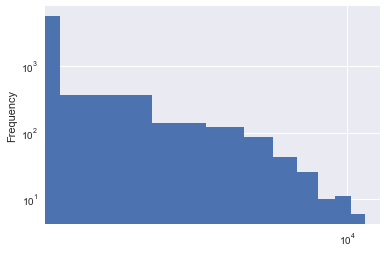

In [26]:
deez.dist.plot(kind='hist', loglog=True)

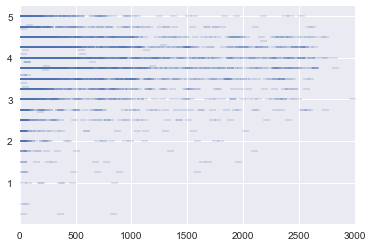

In [27]:
plt.scatter(deez.dist, deez.rating_score, marker=1, alpha=0.2)
plt.xlim(0, 3000)
#plt.xscale('log')
plt.show()

In [33]:
## Use the log of the checkin distance, and just hand-hack it, since many are zeros
def loggy(row):
    return 0 if (row.dist < 0.1) \
            else 1 if row.dist < 10 \
            else 2 if row.dist < 100 \
            else 3 if row.dist < 1000 \
            else 4
deez['logdist'] = deez.apply(lambda x: loggy(x), axis=1)

/Applications/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [34]:
deez.logdist.value_counts()

3    1830
0    1597
2    1326
4     903
1     841
Name: logdist, dtype: int64

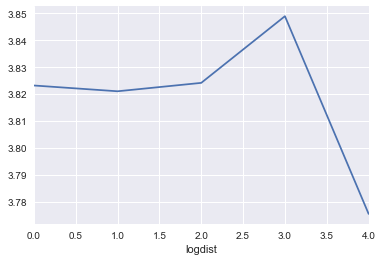

In [35]:
deez.groupby('logdist')['rating_score'].mean().plot()

Not much to parse out of that.  Maybe by isolating the IPA's?

In [36]:
deezIpas = deez[deez['beer.beer_style'].str.startswith('IPA')]

In [37]:
len(deezIpas)

3135

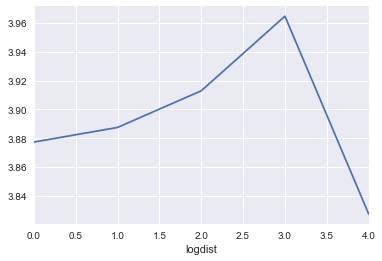

In [38]:
deezIpas.groupby('logdist')['rating_score'].mean().plot()

In [39]:
deez['beer.beer_style'].value_counts()

IPA - American                         1340
IPA - New England                       650
IPA - Imperial / Double                 513
Pale Ale - American                     339
IPA - Imperial / Double New England     182
IPA - Session / India Session Ale       120
Sour - Fruited                          112
Sour - Other                            108
Stout - American Imperial / Double      102
Farmhouse Ale - Saison                  101
Fruit Beer                               90
Märzen                                   86
Stout - Imperial / Double                86
Sour - Berliner Weisse                   85
Pilsner - Other                          63
Red Ale - American Amber / Red           62
Lager - Pale                             62
Lager - American Light                   61
Blonde Ale                               59
Pumpkin / Yam Beer                       59
IPA - Milkshake                          58
Witbier                                  57
Pale Ale - New England          

---What are the median distances for each rating?

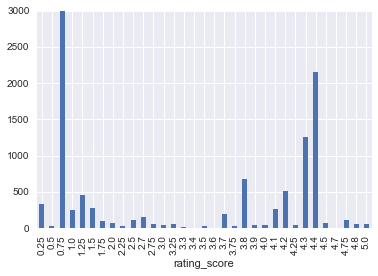

In [41]:
d = deez.groupby('rating_score')['dist'].median()
d.plot(kind='bar', ylim=(0, 3000))

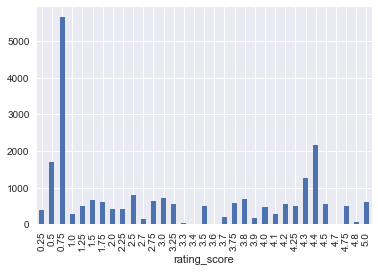

In [42]:
d = deez.groupby('rating_score')['dist'].mean()
d.plot(kind='bar')

The non-quarter-star ratings seem to be farther distances, so let's remove them for clarity

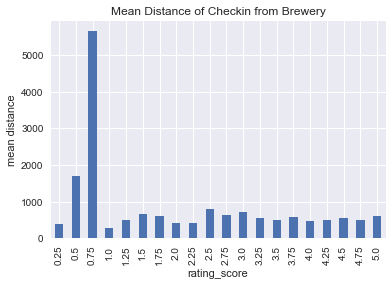

In [43]:
d = deez[(deez.rating_score * 100) % 25 == 0].groupby('rating_score')['dist'].mean()
d.plot(kind='bar')
plt.ylabel('mean distance')
plt.title('Mean Distance of Checkin from Brewery')
plt.show()

In [44]:
tenKdf['twos'] = [pd.notnull(x) and len(x) == 2 for x in tenKdf['venue.location.venue_state'][:]]

states = tenKdf[tenKdf.twos].groupby('venue.location.venue_state')['rating_score'].mean()

states.sort_values(ascending=False)[:25]

venue.location.venue_state
RJ    4.250000
RI    4.083333
VT    4.037879
SA    4.035714
PE    4.000000
CT    3.996795
KY    3.985577
NH    3.950000
AR    3.946875
SC    3.936567
TN    3.933673
WV    3.916667
MT    3.916667
NJ    3.912946
NY    3.906295
SD    3.903846
WA    3.901929
MA    3.893617
MI    3.887900
IL    3.880542
ID    3.880435
CA    3.879243
DE    3.873077
NE    3.866667
NC    3.865506
Name: rating_score, dtype: float64

#### Switch to looking at the big df

In [45]:
df.shape

(1571140, 28)

In [46]:
df.columns

Index(['Unnamed: 0', 'checkin_id', 'beer.bid', 'user.uid', 'rating_score',
       'brewery.brewery_name', 'beer.beer_name', 'beer.beer_style',
       'brewery.brewery_id', 'brewery.brewery_type', 'brewery.country_name',
       'brewery.location.brewery_city', 'brewery.location.brewery_state',
       'brewery.location.lat', 'brewery.location.lng',
       'venue.categories.items', 'venue.location.lat', 'venue.location.lng',
       'venue.location.venue_city', 'venue.location.venue_country',
       'venue.location.venue_state', 'venue.primary_category',
       'venue.venue_id', 'checkin_comment', 'created_at', 'beer.rating_score',
       'beer.beer_description', 'abv'],
      dtype='object')

### Note that the checkins without user ratings are being filtered out here.

In [47]:
df = df[df['rating_score'] > 0]
len(df)

1425447

In [48]:
df.drop('Unnamed: 0', inplace=True, axis=1)

In [49]:
df.loc[:5, 'venue.categories.items']

0                                                  NaN
1    [{'category_key': 'brewery', 'category_name': ...
2    [{'category_key': 'brewery', 'category_name': ...
3                                                  NaN
4                                                  NaN
5                                                  NaN
Name: venue.categories.items, dtype: object

In [50]:
df.loc[2, 'venue.categories.items'][0]

'['

So that is a big string version of a list of dicts.  Need to fix that.

In [51]:
import ast  # the json_normalize() returned a string repr of a list, so need this to 'un-string' it

def venuecat(venuecell):
    if pd.isnull(venuecell):
        # empty list to eval to False
        return list()
    # list with primary category first
    try:
        venuecell = ast.literal_eval(venuecell)
        return [item['category_key'] for item in venuecell if item['is_primary']] + \
               [item['category_key'] for item in venuecell if not item['is_primary']]
    except TypeError:
        print(venuecell)
        return []
    

In [52]:
df['venue.types'] = df['venue.categories.items'].apply(lambda x: venuecat(x))

In [53]:
len(pd.notnull(df['venue.categories.items']))

1425447

How many venues were checked in?

In [54]:
sum(1 for row in df['venue.types'] if row)

1001743

How many different venue types?

In [56]:
places = {place for row in df['venue.types'] for place in row}

len(places)

773

In [57]:
from collections import Counter
placeCounter = Counter(place for row in df['venue.types'] for place in row)
placeCounter.most_common(20)

[('brewery', 348535),
 ('bar', 153148),
 ('beer_bar', 118502),
 ('american_restaurant', 88976),
 ('pub', 73977),
 ('beer_garden', 68234),
 ('restaurant', 45211),
 ('gastropub', 42665),
 ('beer_store', 39389),
 ('pizza_place', 34767),
 ('sports_bar', 29026),
 ('city', 23956),
 ('burger_joint', 21005),
 ('hotel', 19684),
 ('neighborhood', 19566),
 ('home_private', 18426),
 ('music_venue', 15322),
 ('festival', 14977),
 ('wine_bar', 14052),
 ('event_space', 13448)]

In [58]:
placerates = dict()
for ven in placeCounter.most_common(30):
    there = [True if ven[0] in row else False for row in df['venue.types']]
    placerates[ven[0]] = df[there]['rating_score'].mean()

placerates

{'american_restaurant': 3.786044824794203,
 'bar': 3.8197677304732887,
 'bbq_joint': 3.8037303323955403,
 'beer_bar': 3.8724083486718754,
 'beer_garden': 3.8561970509776353,
 'beer_store': 3.911466399248518,
 'brewery': 3.8323756794555788,
 'burger_joint': 3.8118691677775636,
 'city': 3.9291409250292246,
 'cocktail_bar': 3.8262191719674146,
 'event_space': 3.796566539639842,
 'festival': 3.8300961474260538,
 'gastropub': 3.83125161139107,
 'home_private': 3.9857375447736914,
 'hotel': 3.69543199140621,
 'housing_development': 3.9069642037631938,
 'lounge': 3.8878803418803423,
 'music_venue': 3.759158108196506,
 'neighborhood': 3.8955688439129115,
 'new_american_restaurant': 3.855426462547841,
 'park': 3.8224934357677727,
 'pizza_place': 3.818679169303343,
 'pub': 3.819049518067406,
 'residential_building_apartment_condo': 3.8757697382889793,
 'restaurant': 3.7915842569854656,
 'seafood_restaurant': 3.7416243954229085,
 'shopping_mall': 3.7682733968804163,
 'sports_bar': 3.7951934349355

In [59]:
## Ridiculously convoluted way to plot string:float pairs
def plot_str_keys(str_keyed_tuplist):
    '''Take a list of (keyword, value) pairs.
    Sort them by highest values.
    Plot them with the keyword on the y-axis
    and value on x-axis, for easier reading.
    '''
    words, vals = zip(*sorted(str_keyed_tuplist, key=lambda x: x[1], reverse=True))
    plt.figure(figsize=(10, len(words)*2//3))
    plt.plot(vals, range(len(words), 0, -1))
    plt.yticks(range(len(words), 0, -1), words)
    plt.show()

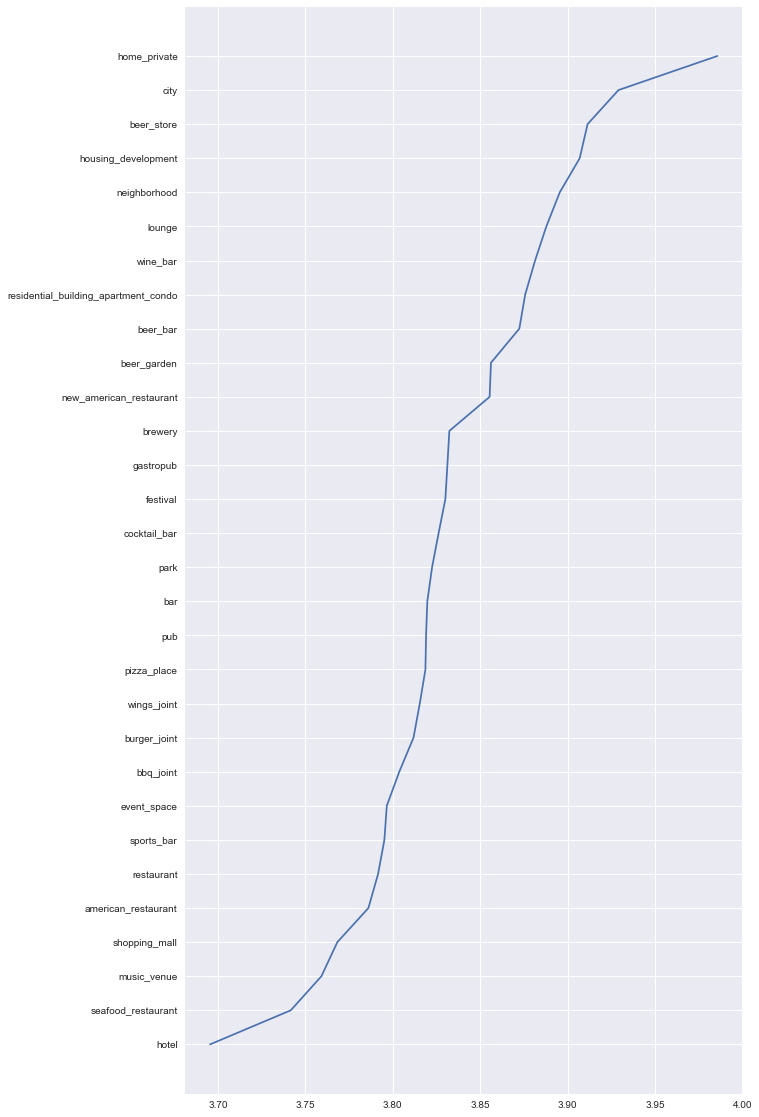

In [60]:
plot_str_keys(placerates.items())

Make a column for just the first venue type listed in the venue category items

In [62]:
df['first_place'] = df.apply(lambda x: x['venue.types'][0] if x['venue.types'] else '', axis=1)

Top 20 best-rated of those:

In [63]:
df.groupby('first_place')['rating_score'].mean().sort_values(ascending=False)[:20]

first_place
check_cashing_service    5.000000
pop_up_shop              5.000000
anhui_restaurant         5.000000
film_studio              4.791667
law_school               4.750000
leather_goods_store      4.500000
swim_school              4.500000
shoe_repair              4.500000
college_library          4.472727
memorial_site            4.391667
lighting_store           4.375000
observatory              4.375000
erotic_museum            4.367188
circus_school            4.333333
driving_school           4.285714
juice_bar                4.277174
pet_cafe                 4.267308
parade                   4.254098
kitchen_supply_store     4.250000
deli_or_bodega           4.250000
Name: rating_score, dtype: float64

Those are interesting primary venues, but obviously not the most frequent places.
How to get ratings of most frequent places?

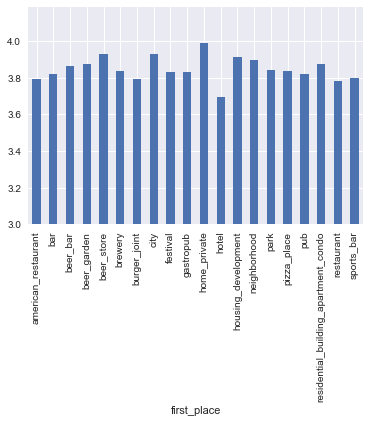

In [64]:
fp = df.set_index('first_place')

freqs = df.groupby('first_place').size().sort_values(ascending=False)

# discard the most common venue, which was 'no venue'
top20 = freqs[1:21].index.values

# now group on the top 20 locs
fp.loc[top20].groupby('first_place')['rating_score'].mean().plot(kind='bar', ylim=3)

Top 20 high-rated beers:

In [65]:
df.groupby('brewery.brewery_name')['rating_score'].mean().sort_values(ascending=False)[:20]

brewery.brewery_name
Twisted Anchor Brewing          5.0
Dog Hair Craft                  5.0
ChewYourBeer B.O.P.             5.0
Mt Vernon Brewing               5.0
Domaine Julien Thurel           5.0
5tyle Brewery                   5.0
McAneney Ales                   5.0
Mad Maltz                       5.0
Lyman Orchards                  5.0
Draught Dodger Brewery          5.0
Lazy Bulldog Brewing            5.0
apcomplete                      5.0
Bread & Barley                  5.0
Land Of Lincoln Winery          5.0
Breiss                          5.0
Brett And Blondes Brewing       5.0
BrewDemon                       5.0
Kül Brewing                     5.0
Brewery J                       5.0
Blue Lobster Brewing Company    5.0
Name: rating_score, dtype: float64

#### The outliers are getting too much attention in these "Top 20" lists.  Fix that by focusing on frequencies:

In [66]:
def topXratings(feat, x=60, figsize=(20,10)):
    temp = df.set_index(feat)
    freqs = df.groupby(feat).size().sort_values(ascending=False)
    topX = freqs[:x].index.values
    plt.figure(figsize=figsize)
    temp.loc[topX].groupby(feat)['rating_score'].mean().plot(kind='bar', ylim=3)
    plt.show()

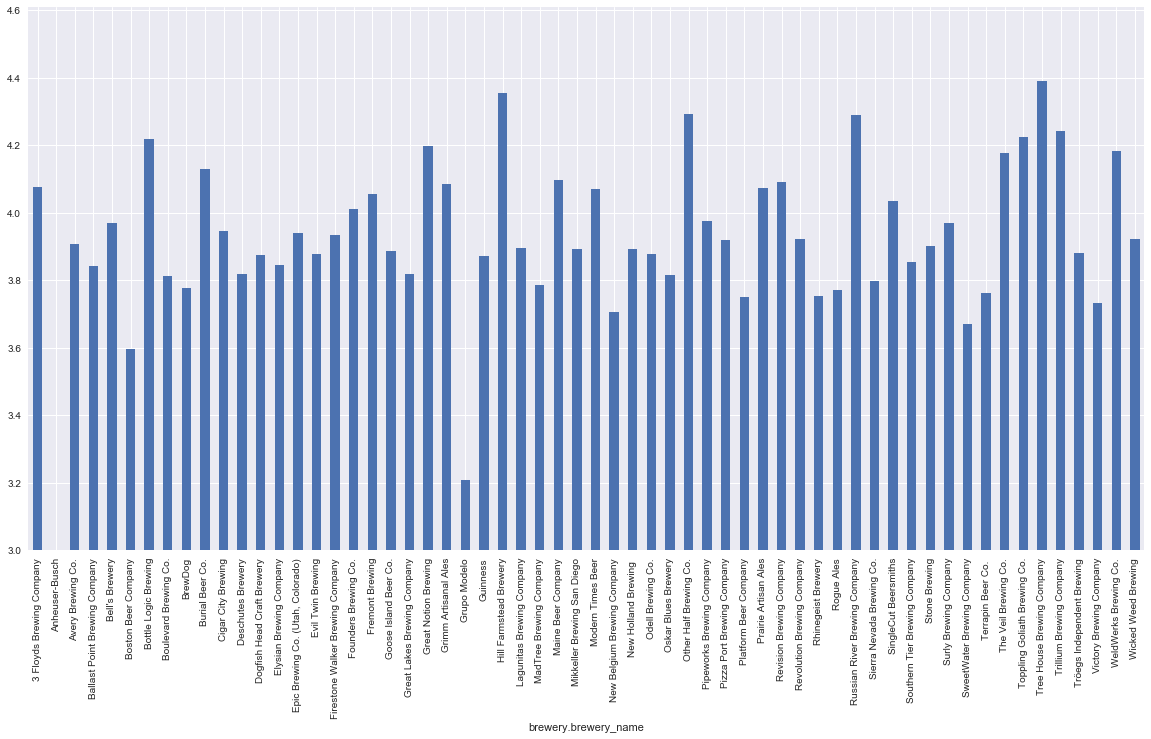

In [67]:
topXratings('brewery.brewery_name', 60, (20,10))

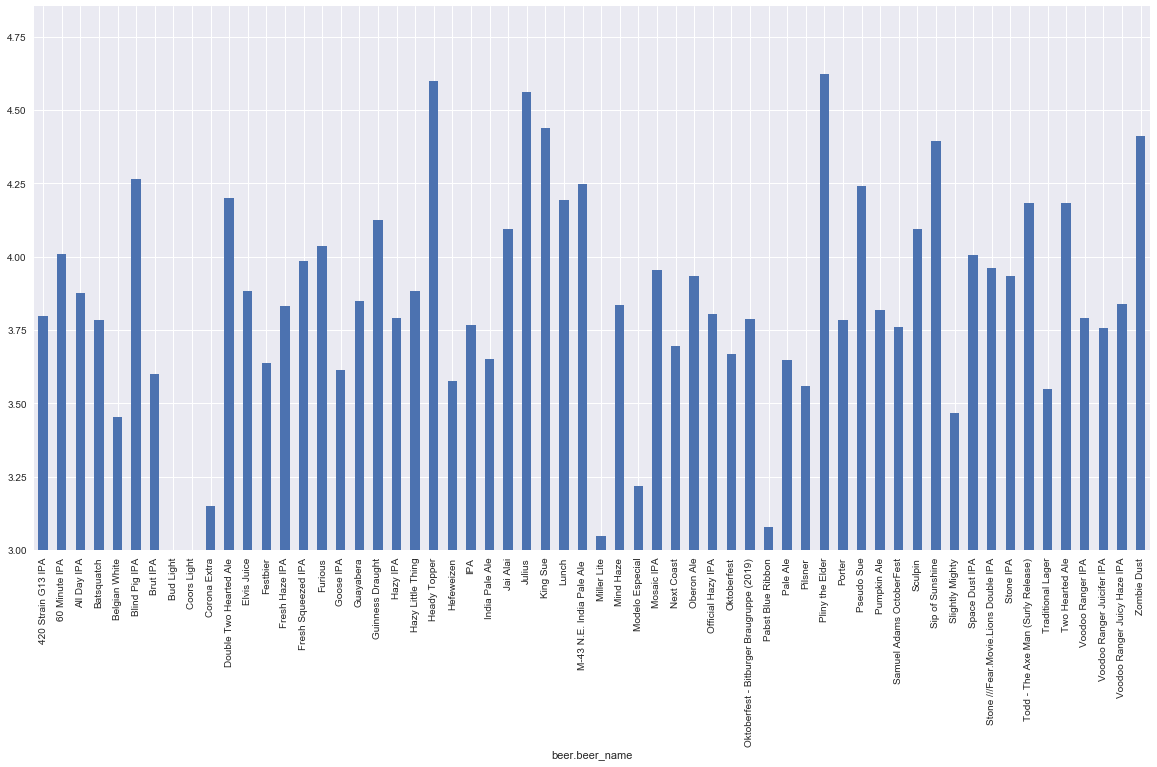

In [68]:
topXratings('beer.beer_name', 60, (20,10))

"Handcut" some bins for abv's, which are distributed most densely in the 5%-8% area, generally

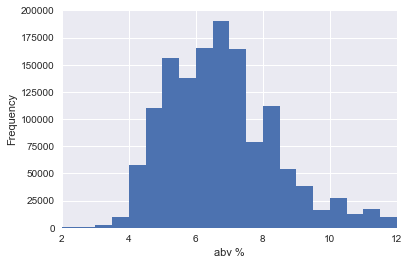

In [69]:
df.abv.plot(kind='hist', bins=160, xlim=(2,12))
plt.xlabel('abv %')
plt.show()

In [70]:
bincuts = np.concatenate([np.array([0,2,3,3.5,3.9,4.1]), np.linspace(4.3,6.3,num=11),
                          np.linspace(6.41,8.41,num=21), np.linspace(8.6, 9.6, num=5),
                          np.array([9.9,10.2,10.6,11.2,13,20])])

In [71]:
bincuts

array([ 0.  ,  2.  ,  3.  ,  3.5 ,  3.9 ,  4.1 ,  4.3 ,  4.5 ,  4.7 ,
        4.9 ,  5.1 ,  5.3 ,  5.5 ,  5.7 ,  5.9 ,  6.1 ,  6.3 ,  6.41,
        6.51,  6.61,  6.71,  6.81,  6.91,  7.01,  7.11,  7.21,  7.31,
        7.41,  7.51,  7.61,  7.71,  7.81,  7.91,  8.01,  8.11,  8.21,
        8.31,  8.41,  8.6 ,  8.85,  9.1 ,  9.35,  9.6 ,  9.9 , 10.2 ,
       10.6 , 11.2 , 13.  , 20.  ])

In [72]:
df['abv_bin'] = pd.cut(df.abv, bincuts)

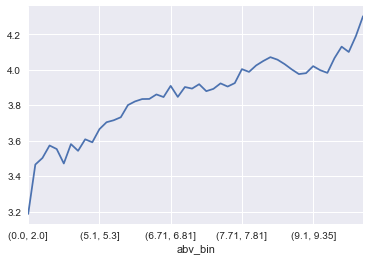

In [73]:
df.groupby('abv_bin')['rating_score'].mean().plot()

Try the state rating system from the sampled df above:

In [75]:

#twos = [pd.notnull(x) and len(x) == 2 for x in df['venue.location.venue_state'][:]]
## Filter the venue_state column down to U.S. state abbreviations
#states = df[twos].groupby('venue.location.venue_state')['rating_score'].mean()
#states.sort_values(ascending=False)[:25]


Or probably just use the topX function for similar results.

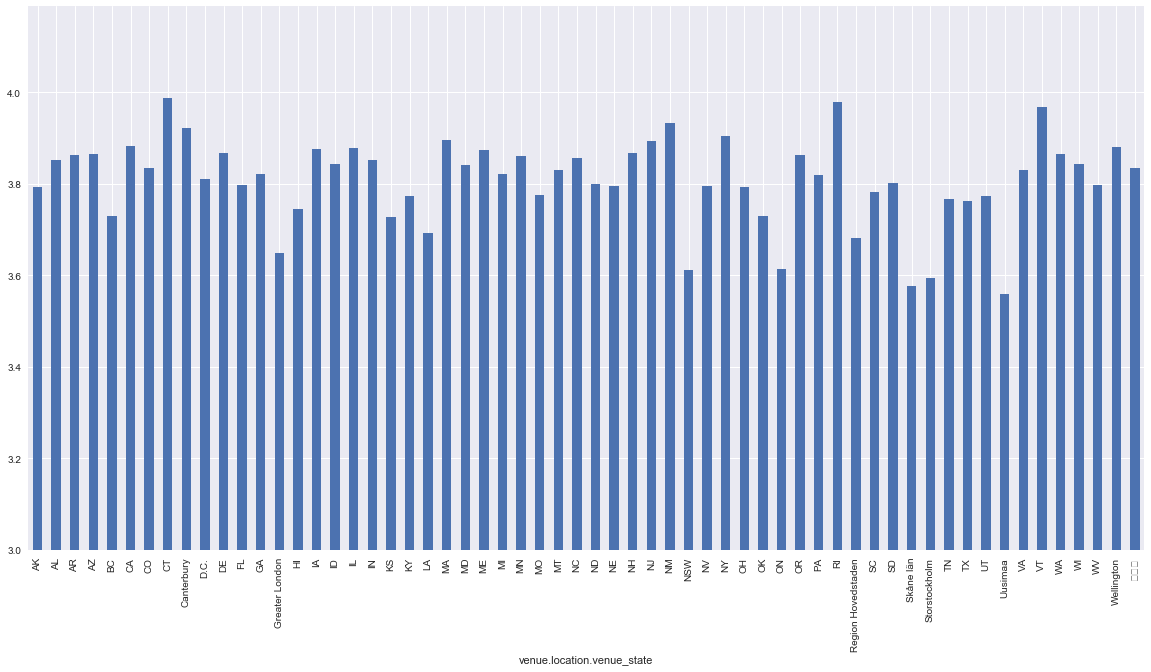

In [76]:
topXratings('venue.location.venue_state')

A lot of those states probably have very few checkins, so pare them down:

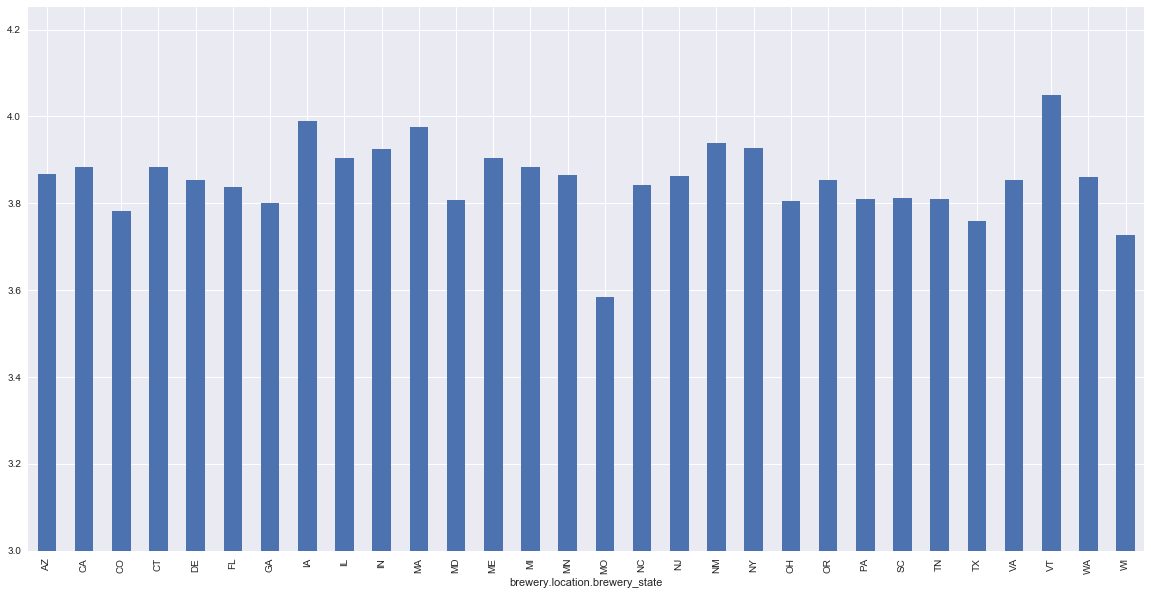

In [77]:
topXratings('brewery.location.brewery_state', x=30)


#### Take a look at some words in the descriptions.

In [78]:
df['beer.beer_description'] = df['beer.beer_description'].fillna(value='').str.lower()

In [79]:
def rate_word(word):
    '''Show mean ratings for descriptions with the argument word.'''
    hasWord = df['beer.beer_description'].str.contains(word)
    print(f'{word.upper()} appears in {sum(hasWord)} descriptions.')
    return word.upper(), df[hasWord]['rating_score'].mean()

In [80]:
rate_word('galaxy')

GALAXY appears in 43939 descriptions.


('GALAXY', 4.026072509615604)

In [81]:
hops = ['galaxy','citra','mosaic','amarillo','nelson','columbus','cascade','hallertau','nugget','motueka',
       'centennial','goldings','rakau','idaho','willamette']
hop_rates = [rate_word(hop) for hop in hops]

GALAXY appears in 43939 descriptions.
CITRA appears in 148966 descriptions.
MOSAIC appears in 120205 descriptions.
AMARILLO appears in 51997 descriptions.
NELSON appears in 18518 descriptions.
COLUMBUS appears in 16141 descriptions.
CASCADE appears in 39659 descriptions.
HALLERTAU appears in 10217 descriptions.
NUGGET appears in 6670 descriptions.
MOTUEKA appears in 13832 descriptions.
CENTENNIAL appears in 40246 descriptions.
GOLDINGS appears in 2930 descriptions.
RAKAU appears in 2526 descriptions.
IDAHO appears in 12719 descriptions.
WILLAMETTE appears in 2867 descriptions.


In [82]:
more_hops = ['azacca','bravo','bru-1','cashmere','chinook','ctz','dorado',
             'hbc','medusa','pekko','sterling','strata','summit','warrior','zappa']
more_rates = [rate_word(hop) for hop in more_hops]
hop_rates = hop_rates + more_rates 

AZACCA appears in 15585 descriptions.
BRAVO appears in 2837 descriptions.
BRU-1 appears in 878 descriptions.
CASHMERE appears in 8722 descriptions.
CHINOOK appears in 23827 descriptions.
CTZ appears in 2807 descriptions.
DORADO appears in 29124 descriptions.
HBC appears in 2436 descriptions.
MEDUSA appears in 371 descriptions.
PEKKO appears in 495 descriptions.
STERLING appears in 1458 descriptions.
STRATA appears in 5545 descriptions.
SUMMIT appears in 3953 descriptions.
WARRIOR appears in 4219 descriptions.
ZAPPA appears in 406 descriptions.


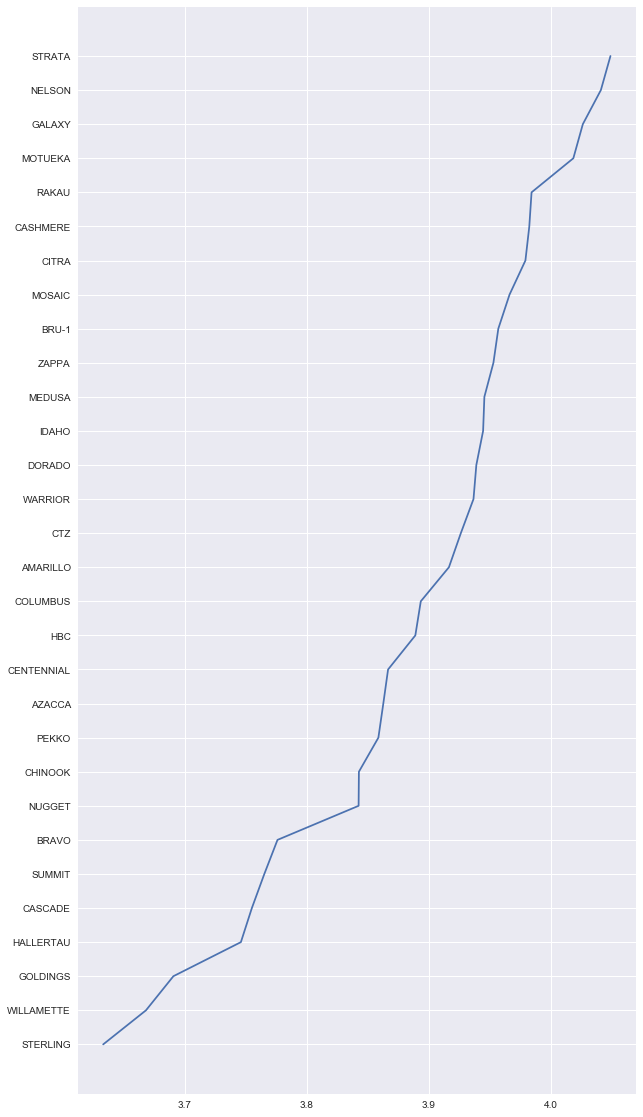

In [83]:
plot_str_keys(hop_rates)

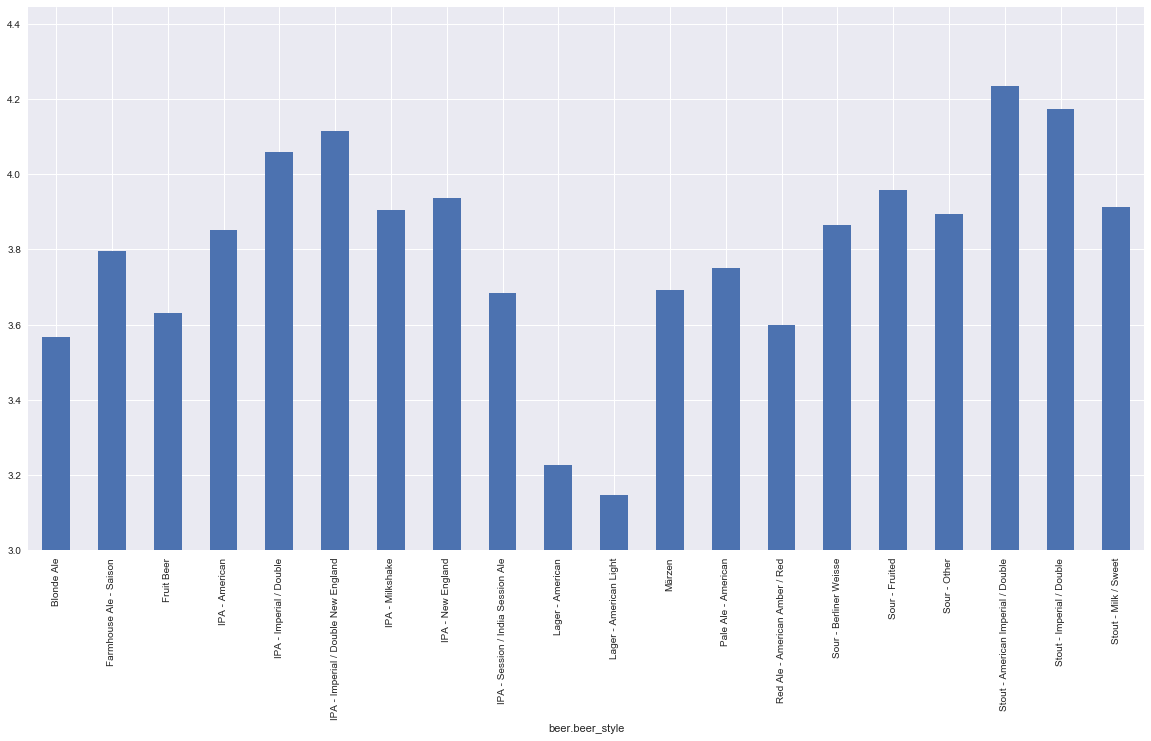

In [84]:
topXratings('beer.beer_style', x=20)

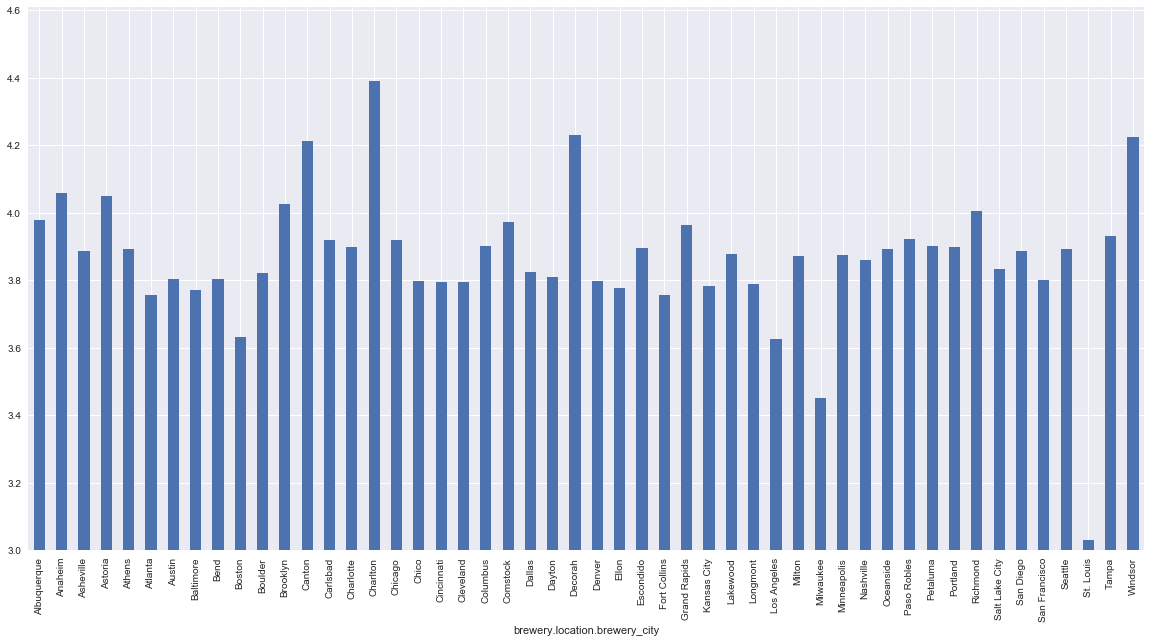

In [85]:
topXratings('brewery.location.brewery_city', x=50)

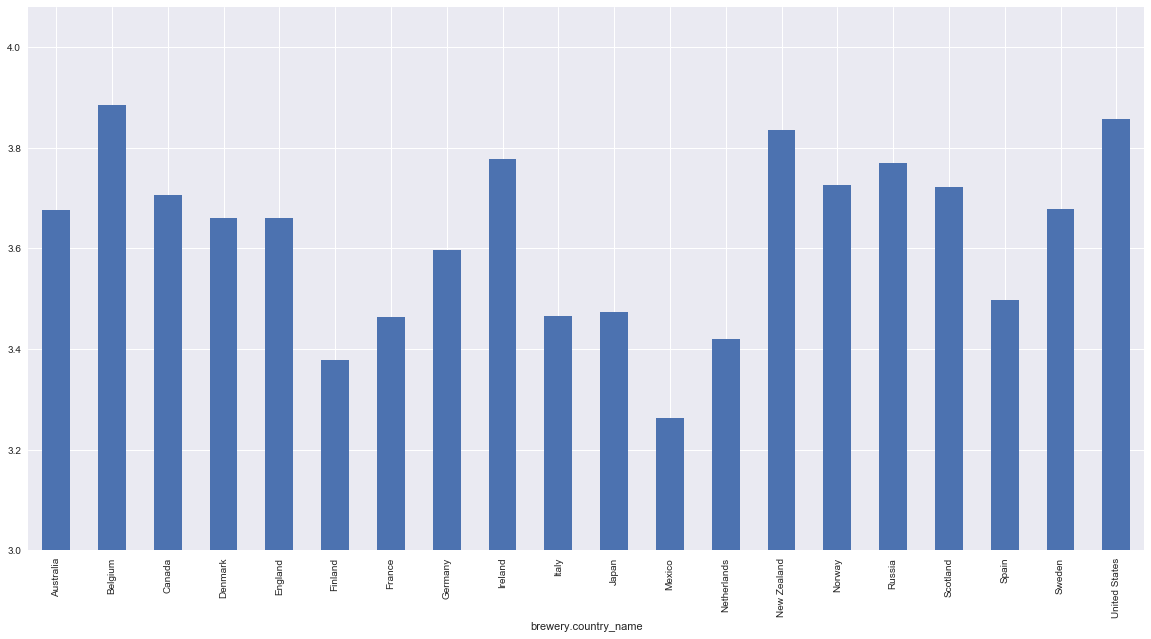

In [86]:
topXratings('brewery.country_name', x=20)

Would like to now go back and run some of those distance correlations on the whole df.

In [88]:
df['dist'] = df.apply(lambda row: dist(row), axis=1)
df['logdist'] = df.apply(lambda x: loggy(x), axis=1)

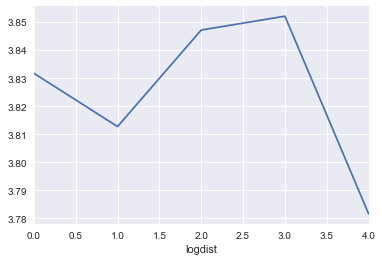

In [89]:
df.groupby('logdist')['rating_score'].mean().plot()

Check the mean rating for checkins without venue specified

In [92]:
df[df.dist == -1]['rating_score'].mean()

3.8324447614664163

In [91]:
df.logdist.value_counts() # The zeros here include no checkin venue given, which turns out not to matter

0    661594
3    279263
2    207770
4    143531
1    133289
Name: logdist, dtype: int64

In [93]:
deez = df[df.dist > -1]
len(deez)

1010474

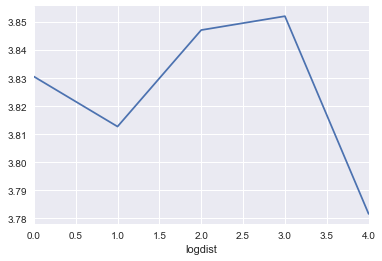

In [94]:
deez.groupby('logdist')['rating_score'].mean().plot()

How are users distributed as far as their rating levels?

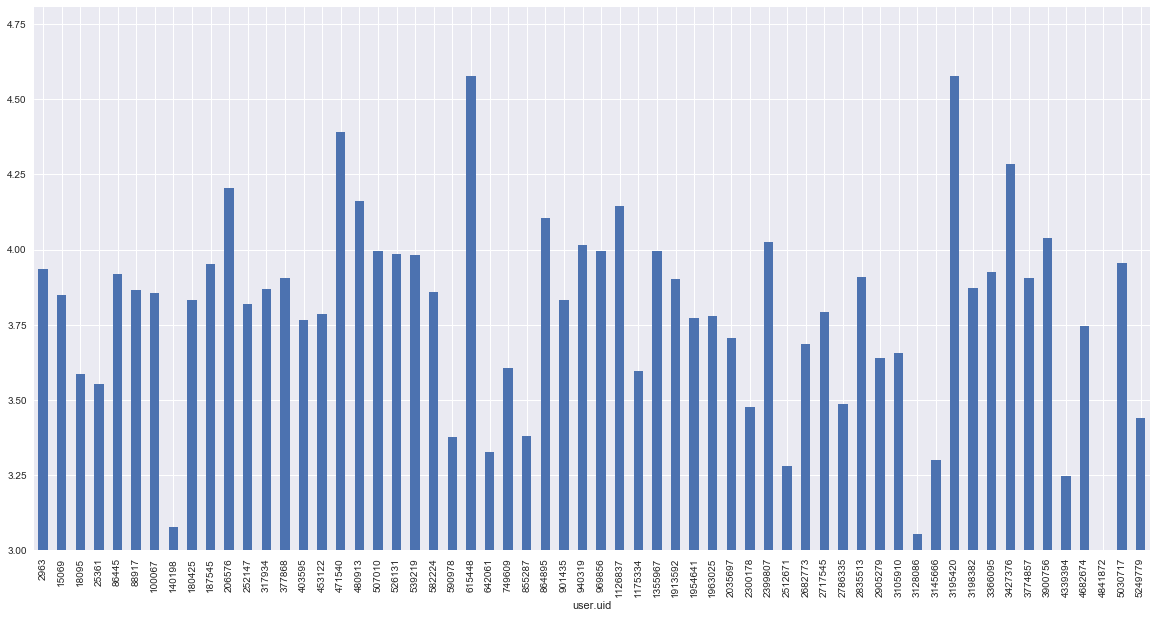

In [100]:
topXratings('user.uid')

Number of distinct users, beers, and breweries:

In [103]:
len({u for u in df['user.uid']})

7907

In [104]:
len({b for b in df['beer.bid']})

264620

In [105]:
len({b for b in df['brewery.brewery_name']})

19476

Distribution of same:

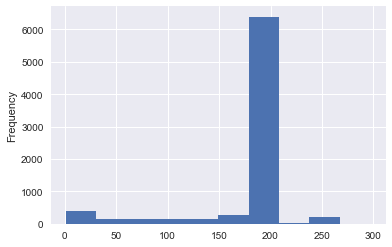

In [106]:
df.groupby('user.uid').size().plot(kind='hist')

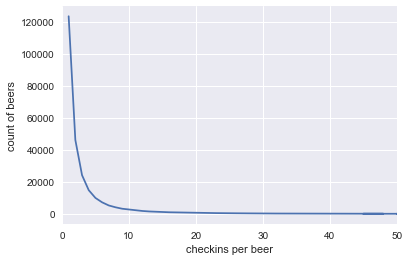

In [123]:
df.groupby('beer.bid').size().value_counts().plot(xlim=(0,50))
plt.xlabel('checkins per beer')
plt.ylabel('count of beers')

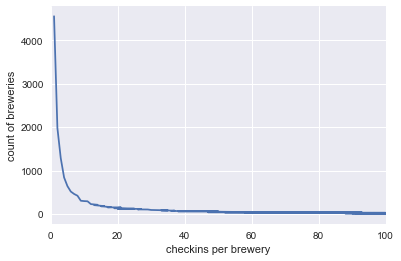

In [122]:
df.groupby('brewery.brewery_name').size().value_counts().plot(xlim=(0,100))
plt.xlabel('checkins per brewery')
plt.ylabel('count of breweries')

Since these checkins were taken from users who frequently checked in on an arbitrary list of IPA's, let's see how their IPA ratings compare to the global IPA ratings, vs how their non-IPA's compare to the globals.

In [124]:
# First need to drop rows with no globals
rated_df = df[pd.notnull(df['beer.rating_score'])]
len(rated_df)

1036517

In [ ]:
rated_df['is_IPA'] = rated_df['beer.beer_style'].str.startswith('IPA')

rated_df['users - global'] = rated_df['rating_score'] - rated_df['beer.rating_score']

ipa_group = rated_df.groupby('is_IPA')

In [129]:
ipa_group['users - global'].mean()

is_IPA
False    0.036747
True     0.037201
Name: users - global, dtype: float64

In [127]:
print(ipa_group['rating_score'].mean() - ipa_group['beer.rating_score'].mean())


is_IPA
False    0.036747
True     0.037201
dtype: float64


So these users do rate IPA's higher than the rest of the world does, but they also rate non_IPA's higher, by about the same amount.
#### Since these ratings were taken from the most recent 200 checkins for so many users, maybe ratings are just going upward over time, whether the users are finding better beers, or brewers are making better beers, or whatever the reason.

This brings us to the dimension of time, so let's explore that a bit

In [139]:
# This took a few minutes
date = pd.to_datetime(df['created_at'])

df['date'] = date

In [140]:
dateDF = df.sample(100)

How are checkins distributed by calendar month?

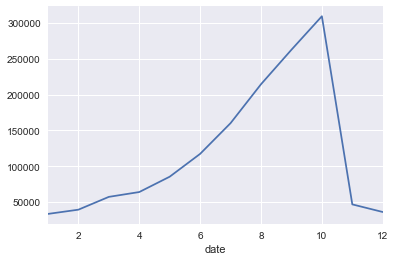

In [148]:
df.groupby(df.date.dt.month).size().plot()

OK, so this is not an "Oktoberfest" effect; The data was collected in Oct-Nov, with most recent checkins first.  The same chart by year should be similarly steep.

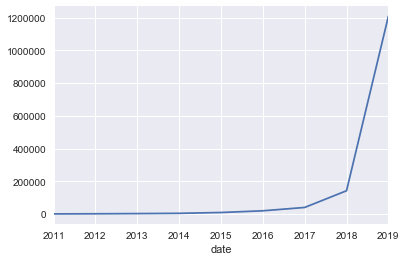

In [149]:
df.groupby(df.date.dt.year).size().plot()

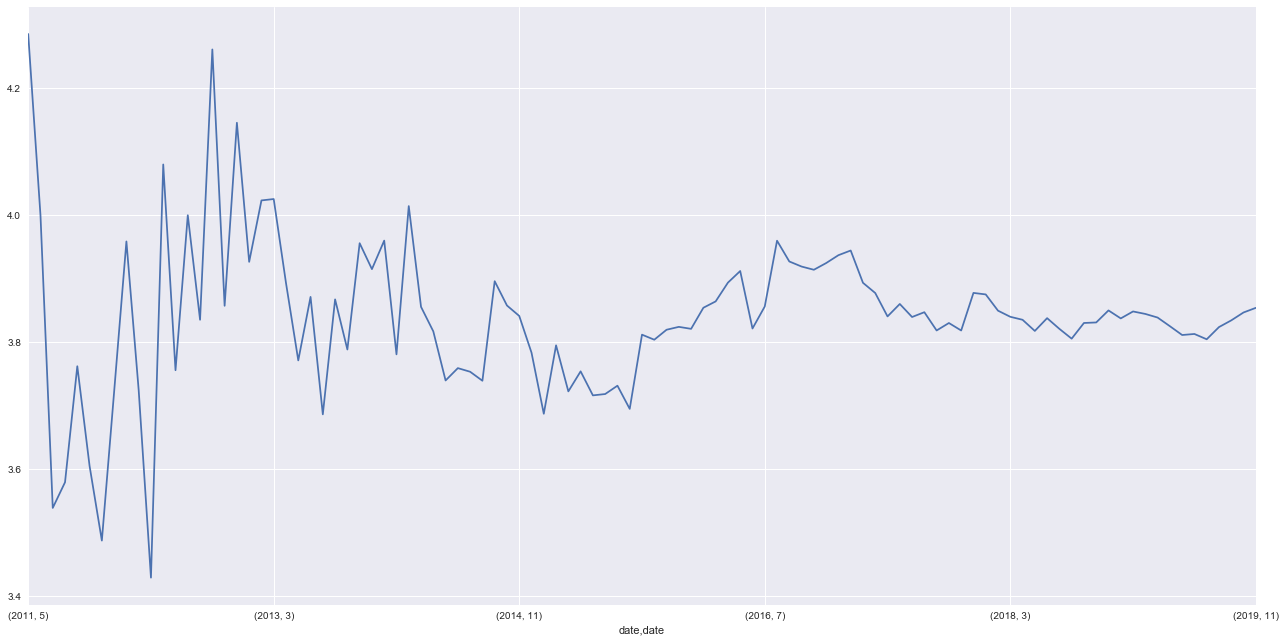

In [176]:
df.groupby([df.date.dt.year, df.date.dt.month]).rating_score.mean().plot(figsize=(22,11))

That just smoothes out from more data towards the right.
Does geographic location of venues change over that period?

In [208]:
yrmo = df.groupby([df.date.dt.year, df.date.dt.month])

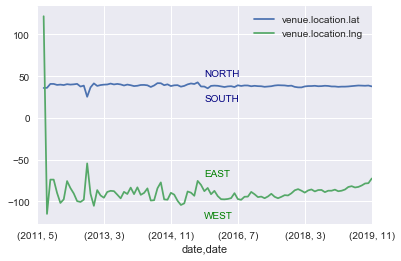

In [209]:
yrmo['venue.location.lat'].mean().plot()
yrmo['venue.location.lng'].mean().plot()
plt.legend()
plt.text(s='NORTH', color='navy', x=50,y=50)
plt.text(s='SOUTH', color='navy', x=50,y=20)
plt.text(s='EAST', color='g', x=50,y=-70)
plt.text(s='WEST', color='g', x=50,y=-120)

plt.show()


#### What's the rate of checkins for this group of 8K users?

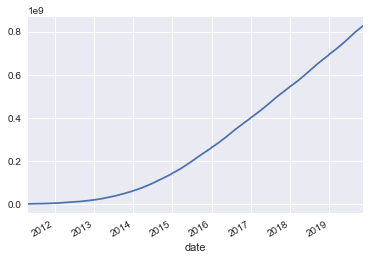

In [215]:
# This is a proxy for the flow of all checkins.  The rate of change of the slope is growth, so it
####  looks like it was growing fastest 2013-2015 and has tapered off since then, but is slowly growing still.
df.set_index('date').sort_index().checkin_id.plot()

Look at growth another way, and in shorter intervals:

In [216]:
# set index to dates to be able to sort them and work with them faster
dated = df.set_index('date').sort_index()

In [239]:
# we'll take 13-week intervals and see the mean checkin_id for that quarter, then compare
## the quarter-on-quarter changes and see when they're growing fastest and slowest (a.k.a. growth)
dates = pd.date_range(start=dated.index[0], periods=35, freq='91D').normalize()  # remove the time
dates

DatetimeIndex(['2011-05-01', '2011-07-31', '2011-10-30', '2012-01-29',
               '2012-04-29', '2012-07-29', '2012-10-28', '2013-01-27',
               '2013-04-28', '2013-07-28', '2013-10-27', '2014-01-26',
               '2014-04-27', '2014-07-27', '2014-10-26', '2015-01-25',
               '2015-04-26', '2015-07-26', '2015-10-25', '2016-01-24',
               '2016-04-24', '2016-07-24', '2016-10-23', '2017-01-22',
               '2017-04-23', '2017-07-23', '2017-10-22', '2018-01-21',
               '2018-04-22', '2018-07-22', '2018-10-21', '2019-01-20',
               '2019-04-21', '2019-07-21', '2019-10-20'],
              dtype='datetime64[ns]', freq='13W-SUN')

In [241]:
# This sets all times to midnight, for comparisons
dated = dated.set_index(dated.index.normalize())

In [262]:
# Use those quarterly dates to make a column of date bins to be able to group by them
dated['datebin'] = pd.cut(dated.index, dates)

In [271]:
means = dated.groupby('datebin')['checkin_id'].mean()   # this makes a Series whose index is the date bins

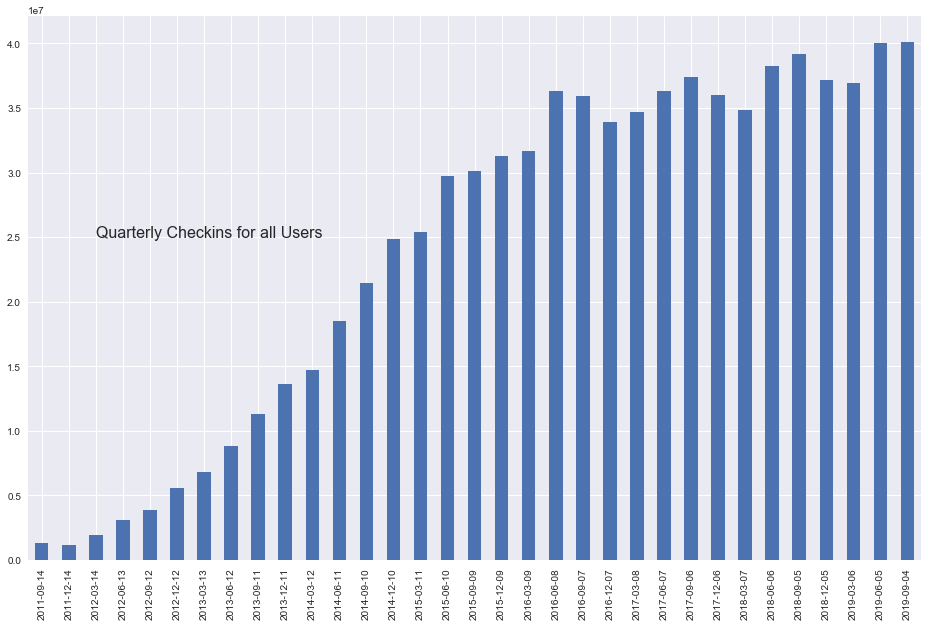

In [319]:
# Now make a column of quarterly diffs, and use the bin (index) midpoints as xticks
diffs = pd.Series([int(means[i]-means[i-1]) for i in range(1,len(means))], index=[i.mid.date() for i in means.index[1:]])
diffs.plot(kind='bar', figsize=(16,10))
plt.text(x=2, y=2.5e7, s='Quarterly Checkins for all Users', fontsize=16)
plt.show()

Let's see what percentage of all checkins are IPA's as time progresses. 
Start by making a binary "is IPA" column.

In [321]:
dated['ipa'] = dated['beer.beer_style'].str.startswith('IPA')

all_checkins = dated.groupby('datebin').size()
ipa_checkins = dated[dated.ipa].groupby('datebin').size()

ipa_pct = pd.concat([all_checkins, ipa_checkins], axis=1)

ipa_pct.head()

In [338]:
# I'd rather see just one date on the x-axis, even if it blurs the fine-grained scale of the data
ipa_pct.index = [i.mid.date() for i in ipa_pct.index]

ipa_pct['pct'] = ipa_pct[1] * 100 / ipa_pct[0]

ipa_pct.head()

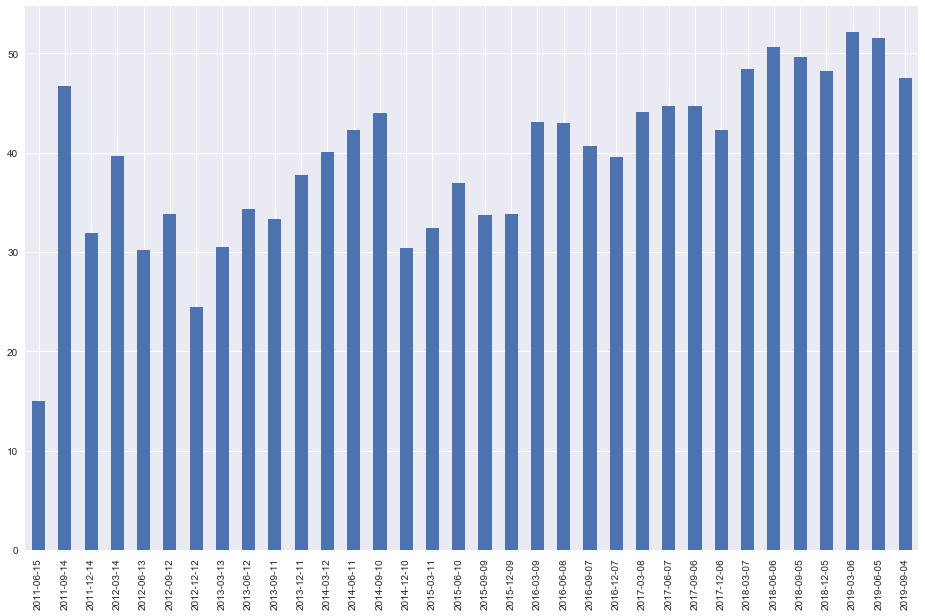

In [341]:
ipa_pct.pct.plot(kind='bar', figsize=(16,10))

IPA checkins going up faster than overall checkins, but note that this group of 8K Users was chosen by who had checked in the most on some randomly selected IPAs